In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster', font_scale=3)
import math
from scipy.integrate import solve_ivp

In [30]:
%config InlineBackend.figure_formats = ['svg']

In [56]:
import seaborn_figure_settings

In [32]:
save_dpath = os.path.join('../notebooks/figures/', 'Fig1')
os.makedirs(save_dpath,exist_ok=True)

In [57]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', ]
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6)]

In [34]:
import os
os.listdir()

['model_store_analyze_monte_biogeo_multi.ipynb',
 'model_store_analyze_monte_het_analyze_flux.ipynb',
 'model_store_analyze_monte_biogeo_create_files.ipynb',
 'model_store_analyze_monte_ponly_curves.ipynb',
 'Overflow_stats.xlsx',
 '10cc_fit_per_model.ipynb',
 'model_store_analyze_monte_curves_cleanup.ipynb',
 'figures',
 'model_store_analyze_monte_curves.ipynb',
 'sample_df.csv.gz',
 'model_store_analyze_monte_het_params.ipynb',
 '.ipynb_checkpoints',
 'model_store_analyze_monte_PCA.ipynb',
 'percent_analysis.xlsx',
 'phylodata',
 '__pycache__',
 'verastile_vpros_multi.ipynb',
 'top_runids.csv',
 'model_store_analyze_monte_het_ROS.ipynb',
 'qc_describe.csv',
 'model_store_analyze_monte_het_analyze_flux_all.ipynb',
 'figures_dynamics_old',
 'verastile_vpros.ipynb',
 'seaborn_figure_settings.py',
 'CC10_phylogenetic_tree.ipynb',
 'model_store_analyze_monte_ponly_params.ipynb',
 'model_store_analyze_monte_curves_top.ipynb',
 'model_store_analyze_monte_het_OVERFLOW.ipynb',
 'create_venn.i

In [35]:
pairwise_dist_df = pd.read_excel( 'phylodata/phyloDist.xlsx', sheet_name='phyloDist')
metadata_df = pd.read_excel( 'phylodata/phyloDist.xlsx', sheet_name='metadata')


In [36]:
metadata_df

,Group,Name,NCBI taxonomy id,strain_nickname
0,Strong,Alteromonas macleodii,28108,HOT1A3
1,Strong,Pseudoalteromonas haloplanktis,326442,CIP
2,Sustained,Ruegeria pomeroyi,246200,DSS-3
3,Sustained,Sulfitobacter pseudonitzschiae,1402135,nitzsch
4,Weak,Escherichia coli,83333,25922
5,Weak,Marinovum HOT5_F3,367771,HOT5_F3
6,Inhibited,Marinobacter adhaerens,225937,HP15
7,Weak,Roseovarius HOT5_C3,215743,HOT5_C3
8,Inhibited,Phaeobacter gallaeciensis,1423144,Pgall


In [37]:
# remove e coli
metadata_df = metadata_df.loc[~metadata_df['Name'].isin(['Escherichia coli'])]
metadata_df

,Group,Name,NCBI taxonomy id,strain_nickname
0,Strong,Alteromonas macleodii,28108,HOT1A3
1,Strong,Pseudoalteromonas haloplanktis,326442,CIP
2,Sustained,Ruegeria pomeroyi,246200,DSS-3
3,Sustained,Sulfitobacter pseudonitzschiae,1402135,nitzsch
5,Weak,Marinovum HOT5_F3,367771,HOT5_F3
6,Inhibited,Marinobacter adhaerens,225937,HP15
7,Weak,Roseovarius HOT5_C3,215743,HOT5_C3
8,Inhibited,Phaeobacter gallaeciensis,1423144,Pgall


In [38]:
gene_matrix_df = pd.read_excel( 'phylodata/genes.xlsx')
trait_matrix_df = pd.read_excel( 'phylodata/traits.xlsx')


In [39]:
phylo_matrix_df = pd.read_csv( 'phylodata/gtdbtk_r220_cophen_dist.csv', index_col=0)
phylo_matrix_df

,nitzsch,Pgall,DSS-3,HOT5_F3,HOT5_C3,HOT1A3,CIP,25922,HP15
nitzsch,0.000000,0.157894,0.164756,0.171875,0.202754,2.537937,2.552027,2.492261,2.456501
Pgall,0.157894,0.000000,0.099989,0.107108,0.137987,2.473170,2.487260,2.427494,2.391734
DSS-3,0.164756,0.099989,0.000000,0.106181,0.137060,2.472243,2.486333,2.426567,2.390807
HOT5_F3,0.171875,0.107108,0.106181,0.000000,0.140698,2.475881,2.489971,2.430205,2.394445
HOT5_C3,0.202754,0.137987,0.137060,0.140698,0.000000,2.474515,2.488605,2.428839,2.393078
HOT1A3,2.537937,2.473170,2.472243,2.475881,2.474515,0.000000,0.354890,0.614962,0.975858
CIP,2.552027,2.487260,2.486333,2.489971,2.488605,0.354890,0.000000,0.629052,0.989948
25922,2.492261,2.427494,2.426567,2.430205,2.428839,0.614962,0.629052,0.000000,0.930182
HP15,2.456501,2.391734,2.390807,2.394445,2.393078,0.975858,0.989948,0.930182,0.000000


In [40]:
gene_matrix_df

,strain.nickname,sedthio,kocur,BS11,DE1,plano,serr,crono,Phalo,citrea,...,abie,viet,owen,dies,HOT5_B8,HOT5_B10,HOT5_C3,HOT5_E6,HOT5_F3,PR1red
0,sedthio,0.000000,0.785921,0.610862,0.619963,0.763889,0.668842,0.687560,0.684987,0.616764,...,0.634877,0.736086,0.724700,0.575476,0.668664,0.699464,0.672104,0.699806,0.700030,0.735570
1,kocur,0.785921,0.000000,0.778760,0.784421,0.730689,0.790631,0.795322,0.739224,0.793577,...,0.773577,0.759162,0.767815,0.773999,0.768553,0.762369,0.768734,0.762428,0.765255,0.762224
2,BS11,0.610862,0.778760,0.000000,0.231930,0.764562,0.638997,0.622852,0.706065,0.449253,...,0.625240,0.696365,0.708648,0.592007,0.707359,0.711811,0.703874,0.713275,0.715204,0.695376
3,DE1,0.619963,0.784421,0.231930,0.000000,0.767803,0.642565,0.632099,0.713992,0.475689,...,0.622779,0.705771,0.715514,0.599175,0.710065,0.710366,0.709478,0.711435,0.714066,0.705656
4,plano,0.763889,0.730689,0.764562,0.767803,0.000000,0.787693,0.787455,0.748579,0.768187,...,0.788275,0.743430,0.735257,0.772019,0.772059,0.776212,0.766990,0.773925,0.778300,0.735955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,HOT5_B10,0.699464,0.762369,0.711811,0.710366,0.776212,0.722249,0.744597,0.572399,0.735951,...,0.672655,0.761654,0.783091,0.684515,0.514578,0.000000,0.520000,0.039264,0.056862,0.769339
84,HOT5_C3,0.672104,0.768734,0.703874,0.709478,0.766990,0.743128,0.745179,0.592765,0.722528,...,0.678965,0.745319,0.753355,0.677798,0.173502,0.520000,0.000000,0.519369,0.520339,0.757031
85,HOT5_E6,0.699806,0.762428,0.713275,0.711435,0.773925,0.722868,0.744921,0.574010,0.737044,...,0.673075,0.763439,0.785005,0.683331,0.516426,0.039264,0.519369,0.000000,0.055768,0.772102
86,HOT5_F3,0.700030,0.765255,0.715204,0.714066,0.778300,0.720696,0.745500,0.578396,0.737984,...,0.673148,0.762467,0.785340,0.686090,0.516440,0.056862,0.520339,0.055768,0.000000,0.772369


In [41]:
metadata_df

,Group,Name,NCBI taxonomy id,strain_nickname
0,Strong,Alteromonas macleodii,28108,HOT1A3
1,Strong,Pseudoalteromonas haloplanktis,326442,CIP
2,Sustained,Ruegeria pomeroyi,246200,DSS-3
3,Sustained,Sulfitobacter pseudonitzschiae,1402135,nitzsch
5,Weak,Marinovum HOT5_F3,367771,HOT5_F3
6,Inhibited,Marinobacter adhaerens,225937,HP15
7,Weak,Roseovarius HOT5_C3,215743,HOT5_C3
8,Inhibited,Phaeobacter gallaeciensis,1423144,Pgall


In [42]:
small_pairwise_dist_df = pairwise_dist_df.loc[
    pairwise_dist_df.strain1.isin(metadata_df.strain_nickname) &
    pairwise_dist_df.strain2.isin(metadata_df.strain_nickname) 
]

In [43]:
phylo_dist_matrix = small_pairwise_dist_df.pivot(index='strain1', columns='strain2')

In [44]:
gene_dist_matrix = gene_matrix_df.loc[gene_matrix_df['strain.nickname'].isin(metadata_df.strain_nickname)]
gene_dist_matrix.index = gene_dist_matrix['strain.nickname']
gene_dist_matrix =  gene_dist_matrix[metadata_df.strain_nickname]
gene_dist_matrix = gene_dist_matrix.reindex(index=metadata_df.strain_nickname)
gene_dist_matrix



,HOT1A3,CIP,DSS-3,nitzsch,HOT5_F3,HP15,HOT5_C3,Pgall
strain_nickname,,,,,,,,
HOT1A3,0.000000,0.447004,0.705086,0.702623,0.714925,0.564989,0.704844,0.689370
CIP,0.447004,0.000000,0.713417,0.718618,0.729038,0.572837,0.722444,0.696241
DSS-3,0.705086,0.713417,0.000000,0.428622,0.492586,0.659122,0.466273,0.392661
nitzsch,0.702623,0.718618,0.428622,0.000000,0.458914,0.662634,0.462587,0.436338
HOT5_F3,0.714925,0.729038,0.492586,0.458914,0.000000,0.678744,0.520339,0.470034
HP15,0.564989,0.572837,0.659122,0.662634,0.678744,0.000000,0.656250,0.649961
HOT5_C3,0.704844,0.722444,0.466273,0.462587,0.520339,0.656250,0.000000,0.455786
Pgall,0.689370,0.696241,0.392661,0.436338,0.470034,0.649961,0.455786,0.000000


In [45]:
trait_matrix_df

,strain,sedthio,kocur,BS11,DE1,plano,serr,crono,Phalo,citrea,...,abie,viet,owen,dies,HOT5_B8,HOT5_B10,HOT5_C3,HOT5_E6,HOT5_F3,PR1red
0,sedthio,0.000000,0.577181,0.370861,0.353741,0.550336,0.484694,0.467742,0.512500,0.376712,...,0.409091,0.468966,0.481203,0.326389,0.386207,0.494186,0.386207,0.505814,0.488372,0.492857
1,kocur,0.577181,0.000000,0.478873,0.496454,0.475410,0.572193,0.559322,0.514286,0.531915,...,0.529412,0.464000,0.504348,0.593333,0.542857,0.503268,0.532374,0.506579,0.496732,0.452991
2,BS11,0.370861,0.478873,0.000000,0.032000,0.513514,0.372973,0.309942,0.428571,0.201493,...,0.319527,0.350365,0.462687,0.366667,0.434211,0.443787,0.434211,0.464706,0.437870,0.395522
3,DE1,0.353741,0.496454,0.032000,0.000000,0.520548,0.394595,0.333333,0.454545,0.204545,...,0.343195,0.367647,0.458015,0.349315,0.418919,0.467456,0.418919,0.488235,0.461538,0.413534
4,plano,0.550336,0.475410,0.513514,0.520548,0.000000,0.595855,0.553073,0.485714,0.503546,...,0.564972,0.492308,0.508475,0.547297,0.514286,0.525316,0.514286,0.528662,0.528302,0.495935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,HOT5_B10,0.494186,0.503268,0.443787,0.467456,0.525316,0.490385,0.459184,0.300000,0.523256,...,0.428571,0.477707,0.530201,0.517241,0.292517,0.000000,0.292517,0.028777,0.035461,0.480000
84,HOT5_C3,0.386207,0.532374,0.434211,0.418919,0.514286,0.540404,0.494565,0.357143,0.503268,...,0.463277,0.460432,0.472441,0.436242,0.017544,0.292517,0.000000,0.294521,0.285714,0.462121
85,HOT5_E6,0.505814,0.506579,0.464706,0.488235,0.528662,0.507177,0.477157,0.302013,0.543353,...,0.439153,0.490446,0.553333,0.528736,0.294521,0.028777,0.294521,0.000000,0.035714,0.493333
86,HOT5_F3,0.488372,0.496732,0.437870,0.461538,0.528302,0.485577,0.454082,0.315789,0.517442,...,0.414894,0.461538,0.543046,0.511494,0.285714,0.035461,0.285714,0.035714,0.000000,0.473333


In [46]:
trait_dist_matrix = trait_matrix_df.loc[trait_matrix_df['strain'].isin(metadata_df.strain_nickname)]
trait_dist_matrix.index = trait_dist_matrix['strain']
trait_dist_matrix =  trait_dist_matrix[metadata_df.strain_nickname]
trait_dist_matrix = trait_dist_matrix.reindex(index=metadata_df.strain_nickname)
trait_dist_matrix



,HOT1A3,CIP,DSS-3,nitzsch,HOT5_F3,HP15,HOT5_C3,Pgall
strain_nickname,,,,,,,,
HOT1A3,0.000000,0.208955,0.432258,0.405229,0.437870,0.324138,0.423841,0.411392
CIP,0.208955,0.000000,0.477124,0.450331,0.497041,0.359155,0.480000,0.424837
DSS-3,0.432258,0.477124,0.000000,0.218045,0.298013,0.405405,0.195312,0.218978
nitzsch,0.405229,0.450331,0.218045,0.000000,0.232877,0.398649,0.201550,0.198529
HOT5_F3,0.437870,0.497041,0.298013,0.232877,0.000000,0.383648,0.285714,0.267974
HP15,0.324138,0.359155,0.405405,0.398649,0.383648,0.000000,0.373239,0.373333
HOT5_C3,0.423841,0.480000,0.195312,0.201550,0.285714,0.373239,0.000000,0.216418
Pgall,0.411392,0.424837,0.218978,0.198529,0.267974,0.373333,0.216418,0.000000


In [47]:
gene_dist_matrix = gene_matrix_df.loc[gene_matrix_df['strain.nickname'].isin(metadata_df.strain_nickname)]
gene_dist_matrix.index = gene_dist_matrix['strain.nickname']
gene_dist_matrix =  gene_dist_matrix[metadata_df.strain_nickname]
gene_dist_matrix = gene_dist_matrix.reindex(index=metadata_df.strain_nickname)
gene_dist_matrix



,HOT1A3,CIP,DSS-3,nitzsch,HOT5_F3,HP15,HOT5_C3,Pgall
strain_nickname,,,,,,,,
HOT1A3,0.000000,0.447004,0.705086,0.702623,0.714925,0.564989,0.704844,0.689370
CIP,0.447004,0.000000,0.713417,0.718618,0.729038,0.572837,0.722444,0.696241
DSS-3,0.705086,0.713417,0.000000,0.428622,0.492586,0.659122,0.466273,0.392661
nitzsch,0.702623,0.718618,0.428622,0.000000,0.458914,0.662634,0.462587,0.436338
HOT5_F3,0.714925,0.729038,0.492586,0.458914,0.000000,0.678744,0.520339,0.470034
HP15,0.564989,0.572837,0.659122,0.662634,0.678744,0.000000,0.656250,0.649961
HOT5_C3,0.704844,0.722444,0.466273,0.462587,0.520339,0.656250,0.000000,0.455786
Pgall,0.689370,0.696241,0.392661,0.436338,0.470034,0.649961,0.455786,0.000000


In [48]:
metadata_df.loc[~metadata_df.strain_nickname.isin(pairwise_dist_df.strain1)]

,Group,Name,NCBI taxonomy id,strain_nickname
5,Weak,Marinovum HOT5_F3,367771,HOT5_F3
7,Weak,Roseovarius HOT5_C3,215743,HOT5_C3


In [49]:
phylo_matrix_df =  phylo_matrix_df[metadata_df.strain_nickname]
phylo_matrix_df = phylo_matrix_df.reindex(index=metadata_df.strain_nickname)
phylo_matrix_df


,HOT1A3,CIP,DSS-3,nitzsch,HOT5_F3,HP15,HOT5_C3,Pgall
strain_nickname,,,,,,,,
HOT1A3,0.000000,0.354890,2.472243,2.537937,2.475881,0.975858,2.474515,2.473170
CIP,0.354890,0.000000,2.486333,2.552027,2.489971,0.989948,2.488605,2.487260
DSS-3,2.472243,2.486333,0.000000,0.164756,0.106181,2.390807,0.137060,0.099989
nitzsch,2.537937,2.552027,0.164756,0.000000,0.171875,2.456501,0.202754,0.157894
HOT5_F3,2.475881,2.489971,0.106181,0.171875,0.000000,2.394445,0.140698,0.107108
HP15,0.975858,0.989948,2.390807,2.456501,2.394445,0.000000,2.393078,2.391734
HOT5_C3,2.474515,2.488605,0.137060,0.202754,0.140698,2.393078,0.000000,0.137987
Pgall,2.473170,2.487260,0.099989,0.157894,0.107108,2.391734,0.137987,0.000000


In [50]:
dist_matrix = phylo_matrix_df
title = 'Tree based on phylo distance'

In [51]:
phylo_matrix_df

,HOT1A3,CIP,DSS-3,nitzsch,HOT5_F3,HP15,HOT5_C3,Pgall
strain_nickname,,,,,,,,
HOT1A3,0.000000,0.354890,2.472243,2.537937,2.475881,0.975858,2.474515,2.473170
CIP,0.354890,0.000000,2.486333,2.552027,2.489971,0.989948,2.488605,2.487260
DSS-3,2.472243,2.486333,0.000000,0.164756,0.106181,2.390807,0.137060,0.099989
nitzsch,2.537937,2.552027,0.164756,0.000000,0.171875,2.456501,0.202754,0.157894
HOT5_F3,2.475881,2.489971,0.106181,0.171875,0.000000,2.394445,0.140698,0.107108
HP15,0.975858,0.989948,2.390807,2.456501,2.394445,0.000000,2.393078,2.391734
HOT5_C3,2.474515,2.488605,0.137060,0.202754,0.140698,2.393078,0.000000,0.137987
Pgall,2.473170,2.487260,0.099989,0.157894,0.107108,2.391734,0.137987,0.000000


In [52]:
metadata_df.strain_nickname.astype(str)

0     HOT1A3
1        CIP
2      DSS-3
3    nitzsch
5    HOT5_F3
6       HP15
7    HOT5_C3
8      Pgall
Name: strain_nickname, dtype: object

In [53]:
dist_matrix.index

Index(['HOT1A3', 'CIP', 'DSS-3', 'nitzsch', 'HOT5_F3', 'HP15', 'HOT5_C3',
       'Pgall'],
      dtype='object', name='strain_nickname')

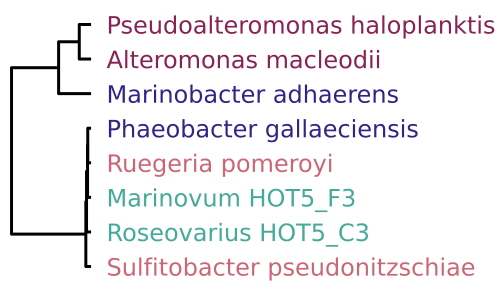

In [54]:
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform


figure(figsize=(1.5, 5))

name_map = metadata_df.Name
name_map.index= metadata_df.strain_nickname.astype(str)

label_colors = metadata_df.Group.map(dict(zip(gorder,gpalette)))
label_colors.index= metadata_df.Name

dists = squareform(dist_matrix)
linkage_matrix = linkage(dists, "single")
dendrogram(
    linkage_matrix, 
    labels=dist_matrix.index.map(name_map), 
    orientation='left', 
    link_color_func=lambda k: 'black',
    leaf_font_size=24,
)
#plt.title("test")


ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])


sns.despine(left=True, bottom=True)
plt.xticks([])
#plt.title(title)
plt.show()

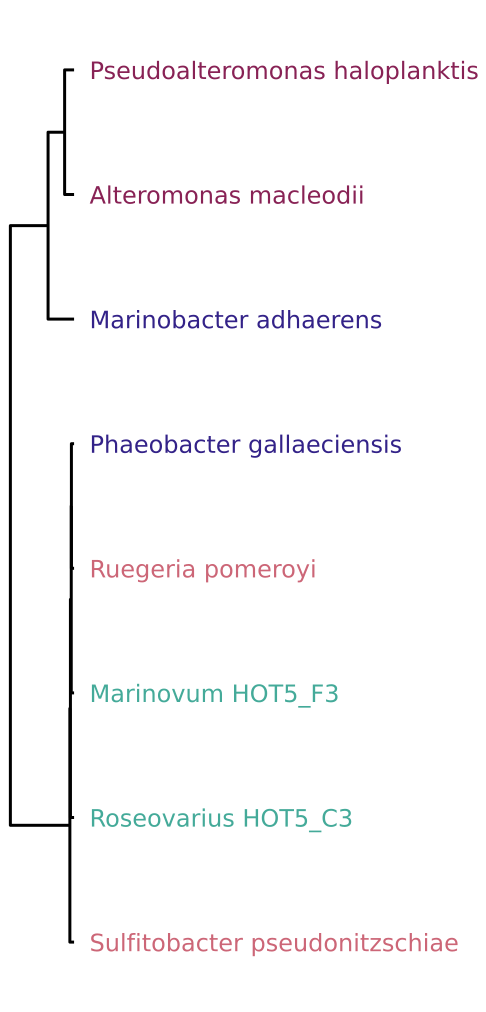

In [58]:
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform


figure(figsize=(1.2, 18))

name_map = metadata_df.Name
name_map.index= metadata_df.strain_nickname.astype(str)

label_colors = metadata_df.Group.map(dict(zip(gorder,gpalette)))
label_colors.index= metadata_df.Name

dists = squareform(dist_matrix)
linkage_matrix = linkage(dists, "single")
dendrogram(
    linkage_matrix, 
    labels=dist_matrix.index.map(name_map), 
    orientation='left', 
    link_color_func=lambda k: 'black',
    leaf_font_size=24,
    #facecolor='none',
)
#plt.title("test")


ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])


sns.despine(left=True, bottom=True)
plt.xticks([])
#plt.title(title)
save_fpath = os.path.join(save_dpath, 'fig_1_heterotroph_tree.svg')
plt.savefig(save_fpath, format='svg', dpi=1200)
plt.show()


In [25]:
label_colors = metadata_df.Group.map(dict(zip(gorder,gpalette)))
label_colors.index= metadata_df.Name


In [26]:
# tree order of strains
list(reversed([lbl.get_text() for lbl in xlbls]))

['Pseudoalteromonas haloplanktis',
 'Alteromonas macleodii',
 'Marinobacter adhaerens',
 'Phaeobacter gallaeciensis',
 'Ruegeria pomeroyi',
 'Marinovum HOT5_F3',
 'Roseovarius HOT5_C3',
 'Sulfitobacter pseudonitzschiae']

In [27]:
# tree order of groups

groupmap = metadata_df.Group
groupmap.index= metadata_df.Name

list(reversed([groupmap[lbl.get_text()] for lbl in xlbls]))

['Strong',
 'Strong',
 'Inhibited',
 'Inhibited',
 'Sustained',
 'Weak',
 'Weak',
 'Sustained']

In [28]:
dist_matrix = gene_dist_matrix
title = 'Tree based on genes distance'

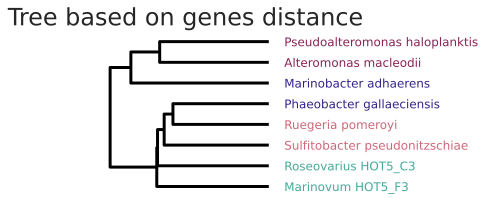

In [29]:
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform


figure(figsize=(3, 3))

name_map = metadata_df.Name
name_map.index= metadata_df.strain_nickname

label_colors = metadata_df.Group.map(dict(zip(gorder,gpalette)))
label_colors.index= metadata_df.Name

dists = squareform(dist_matrix)
linkage_matrix = linkage(dists, "single")
dendrogram(
    linkage_matrix, 
    labels=dist_matrix.index.map(name_map), 
    orientation='left', 
    link_color_func=lambda k: 'black'
)
#plt.title("test")


ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])


sns.despine(left=True, bottom=True)
plt.xticks([])
plt.title(title)
plt.show()

In [30]:
dist_matrix = trait_dist_matrix
title = 'Tree based on trait distance'

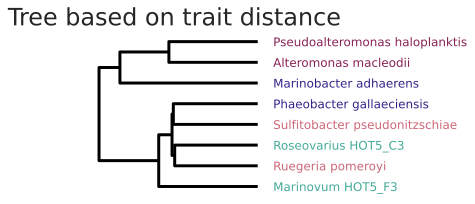

In [31]:
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform


figure(figsize=(3, 3))

name_map = metadata_df.Name
name_map.index= metadata_df.strain_nickname

label_colors = metadata_df.Group.map(dict(zip(gorder,gpalette)))
label_colors.index= metadata_df.Name

dists = squareform(dist_matrix)
linkage_matrix = linkage(dists, "single")
dendrogram(
    linkage_matrix, 
    labels=dist_matrix.index.map(name_map), 
    orientation='left', 
    link_color_func=lambda k: 'black'
)
#plt.title("test")


ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])


sns.despine(left=True, bottom=True)
plt.xticks([])
plt.title(title)
plt.show()

In [32]:
dist_matrix = phylo_dist_matrix
title = 'Tree based on phylo distance'

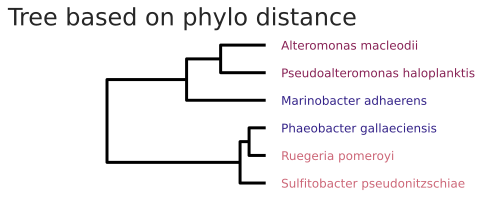

In [33]:
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform


figure(figsize=(3, 3))

name_map = metadata_df.Name
name_map.index= metadata_df.strain_nickname

label_colors = metadata_df.Group.map(dict(zip(gorder,gpalette)))
label_colors.index= metadata_df.Name

dists = squareform(dist_matrix)
linkage_matrix = linkage(dists, "single")
dendrogram(
    linkage_matrix, 
    labels=dist_matrix.index.map(name_map), 
    orientation='left', 
    link_color_func=lambda k: 'black'
)
#plt.title("test")


ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])


sns.despine(left=True, bottom=True)
plt.xticks([])
plt.title(title)
plt.show()